# ASTR 310 Lecture 18 - FITS files

### Exercise 1: plotting an image from a FITS file

Using NumPy, Matplotlib, and Astropy, read in the file `lmc_ha_b20.fits` and do the following:  
- Get the image data from the first HDU.

- Take the common logarithm of the image data.

[4 pts]

In [55]:
import astropy.io.fits
import astropy.table
import numpy as np
import matplotlib.pyplot as plt

In [19]:
primary_hdu = astropy.io.fits.open("lmc.ha.b20.fits")[0]
data = primary_hdu.data
log_data = np.log(data)
log_data

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_88936/3187382245.py:3: RuntimeWarning: divide by zero encountered in log
  log_data = np.log(data)


array([[-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       ...,
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf],
       [-inf, -inf, -inf, ..., -inf, -inf, -inf]], dtype=float32)

- Get the first HDU's keywords `NAXIS1`, `NAXIS2`, `CDELT1`, and `CDELT2` (the latter two are in degrees/pixel). Use this information to compute the extent of the image in arcseconds. (Use the abs value of `CDELT1`... RA goes backwards.)
[4 pts]

In [34]:
naxis1 = primary_hdu.header["NAXIS1"]
naxis2 = primary_hdu.header["NAXIS2"]
cdelt1 = primary_hdu.header["CDELT1"]
cdelt2 = primary_hdu.header["CDELT2"]

axis1_arcseconds = naxis1 * np.abs(cdelt1) * 3600
axis2_arcseconds = naxis2 * cdelt2 * 3600
print(axis1_arcseconds)
print(axis2_arcseconds)

32399.999517202225
32399.99951720242


- Plot the log image using the extent determined by the above keywords and placing the origin at lower left.
You will want to adjust the color mapping using the vmin and vmax parameters.  Don't forget axis labels and title.
[4 pts]

Text(0.5, 1.0, 'LMC Ha')

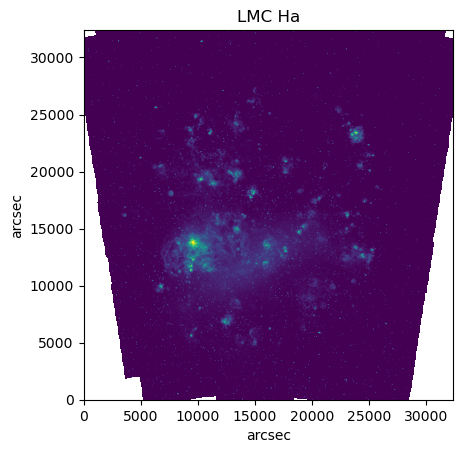

In [51]:
plt.imshow(log_data, extent=[0, axis1_arcseconds, 0, axis2_arcseconds], origin='lower', vmin=-0.5, vmax=4)
plt.xlabel("arcsec")
plt.ylabel("arcsec")
plt.title("LMC Ha")

# Exercise 2: modifying a FITS table


- The files `table1.fits` and `table2.fits` each contain an empty primary HDU and a binary table extension HDU. The table data are drawn from a sample of nearby clusters of galaxies.  
The file `table1.fits` contains: cluster name, redshift, RA (J2000) and dec (J2000).  
The file `table2.fits` contains: cluster name, 2-10 keV X-ray luminosity, X-ray temperature in keV.

- Using NumPy and Astropy, read the two files in, merge the tables into one new table, and write the results to a new file `newtable.fits`.

[6 pts]



In [72]:
table1 = astropy.io.fits.open("table1.fits")[1].data
table2 = astropy.io.fits.open("table2.fits")[1].data

table1 = astropy.table.Table(table1)
table2 = astropy.table.Table(table2)

newtable = astropy.table.join(table1, table2, keys="name", join_type='outer')

newtable.write("newtable.fits", format='fits', overwrite=True)

- Double-check that the new table contains all the information you want: read the new table and print its column names.
[2 pts]

In [82]:
table = astropy.io.fits.open('newtable.fits')[1].data
print(table.columns)
print(table)

ColDefs(
    name = 'name'; format = '10A'
    name = 'redshift'; format = 'E'
    name = 'raj2000'; format = '15A'
    name = 'decj2000'; format = '15A'
    name = 'lx2-10'; format = 'D'
    name = 'tx'; format = 'E'
)
[('0336+09', 0.0349, '03h38m35.3s', '+09d57m55s', 2.49e+44,  3.1)
 ('3C, 129', 0.022 , '04h48m58.2s', '+45d02m01s', 2.02e+44,  5.6)
 ('A119', 0.044 , '00h56m21.4s', '-01d15m47s', 2.58e+44,  5.1)
 ('A1644', 0.0456, '12h57m14.8s', '-17d21m13s', 2.38e+44,  4.1)
 ('A1650', 0.0845, '12h58m46.2s', '-01d45m11s', 6.62e+44,  4.9)
 ('A1736', 0.046 , '13h26m52.1s', '-27d06m33s', 1.58e+44,  5.1)
 ('A2029', 0.0767, '15h10m58.7s', '+05d45m42s', 1.97e+45,  7.1)
 ('A2052', 0.0348, '15h16m45.5s', '+07d00m01s', 1.41e+44,  3.4)
 ('A2063', 0.0337, '15h23m01.8s', '+08d38m22s', 1.31e+44,  4.1)
 ('A2065', 0.0721, '15h22m42.6s', '+27d43m21s', 6.46e+44,  9.2)
 ('A2142', 0.0899, '15h58m16.1s', '+27d13m29s', 2.72e+45, 11. )
 ('A2147', 0.0356, '16h02m17.2s', '+15d53m43s', 1.82e+44,  4.4)
 ('A2244'